In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms
        self.epsilon = epsilon
        self.q_values = np.zeros(n_arms)
        self.arm_counts = np.zeros(n_arms)
        self.genre_mapping = {
            0:'sports',
            1:'tech',
            2:'health',
            3:'politics',
            4:'business'
        }
    
    def select_arm(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(0, self.n_arms)
        else:
            return np.argmax(self.q_values)
        
    def update(self, chosen_arm, reward):
        self.arm_counts[chosen_arm] += 1
        n = self.arm_counts[chosen_arm] 
        value = self.q_values[chosen_arm]
        self.q_values[chosen_arm] += ((1/n) * (reward - value))
    
    def get_reward(self, chosen_arm, true_rewards):
        genre = self.genre_mapping[chosen_arm]
        mean, std = true_rewards[genre]
        return np.random.normal(mean, std)

In [9]:
def simulate_greedy_bandit(n_arms, n_trails, epsilon, true_rewards):
    bandit = EpsilonGreedyBandit(n_arms, epsilon)
    rewards = np.zeros(n_trials)
    cumulative_rewards = np.zeros(n_trials)
    selected_arms = np.zeros(n_trails)
    for t in range(n_trials):
        print(t)
        chosen_arm = bandit.select_arm()
        reward = bandit.get_reward(chosen_arm, true_rewards)
        bandit.update(chosen_arm, reward)
        rewards[t] = reward
        cumulative_rewards[t] = rewards[:t+1].sum()
        selected_arms[t] = chosen_arm
    return rewards, cumulative_rewards, selected_arms, bandit

In [10]:
genre_mapping = {
            0:'sports',
            1:'tech',
            2:'health',
            3:'politics',
            4:'business'
}
[genre_mapping[i] for i in genre_mapping]

['sports', 'tech', 'health', 'politics', 'business']

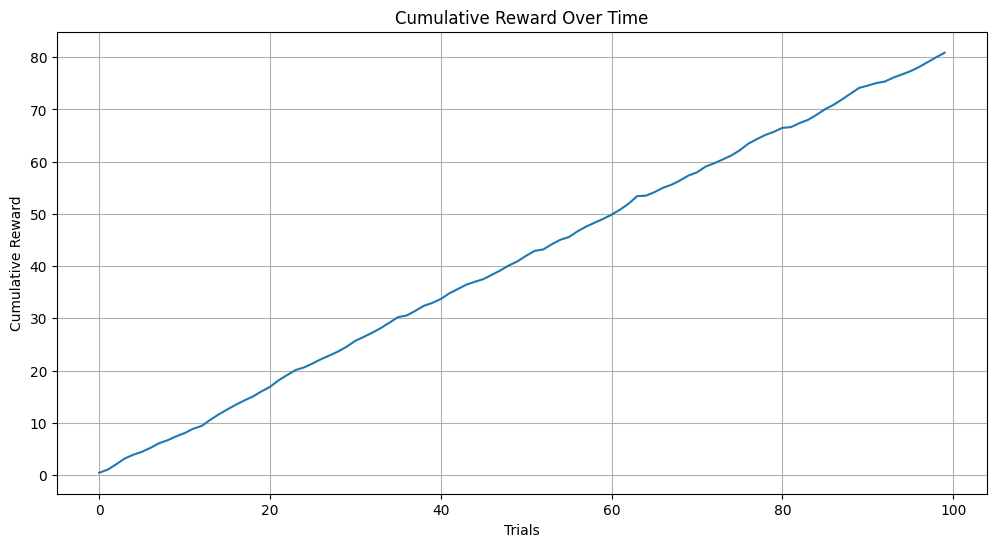

In [75]:
# Cumulative Reward Over Time
'''This shows how the total reward accumulates as we pull more arms.'''
plt.figure(figsize=(12, 6))
plt.plot(cumulative_rewards)
plt.xlabel('Trials')
plt.ylabel('Cumulative Reward')
plt.title('Cumulative Reward Over Time')
plt.grid()
plt.show()

In [4]:
#Gaussian distribution with mean and std values
#Each user has a preference for each genre, their preference has higher score compared to the rest
genre_rewards = {
    0: {'sports': (0.8, 0.2), 'tech': (0.5, 0.3), 'health': (0.65, 0.25), 'politics': (0.6, 0.2), 'business': (0.2, 0.25)},   # Sports lover
    1: {'sports': (0.65, 0.2), 'tech': (0.9, 0.3), 'health': (0.5, 0.15), 'politics': (0.55, 0.3), 'business': (0.65, 0.3)},  # Tech enthusiast
    2: {'sports': (0.4, 0.2), 'tech': (0.5, 0.25), 'health': (0.7, 0.3), 'politics': (0.55, 0.25), 'business': (0.6, 0.3)},   # Health conscious
    3: {'sports': (0.25, 0.15), 'tech': (0.3, 0.2), 'health': (0.35, 0.3), 'politics': (0.7, 0.25), 'business': (0.4, 0.2)},  # Politics enthusiast
    4: {'sports': (0.3, 0.2), 'tech': (0.25, 0.3), 'health': (0.45, 0.3), 'politics': (0.6, 0.3), 'business': (0.85, 0.3)},   # Business interested
}

In [14]:
def simulate_greedy_bandit(n_arms, n_trails, epsilon, true_rewards):
    bandit = EpsilonGreedyBandit(n_arms, epsilon)
    rewards = np.zeros(n_trials)
    cumulative_rewards = np.zeros(n_trials)
    selected_arms = np.zeros(n_trails)
    for t in range(n_trials):
        chosen_arm = bandit.select_arm()
        reward = bandit.get_reward(chosen_arm, true_rewards)
        bandit.update(chosen_arm, reward)
        rewards[t] = reward
        cumulative_rewards[t] = rewards[:t+1].sum()
        selected_arms[t] = chosen_arm
    print("K-arm bandit ran for", n_trials, "Epochs")
    return rewards, cumulative_rewards, selected_arms, bandit

K-arm bandit ran for 1000 Epochs


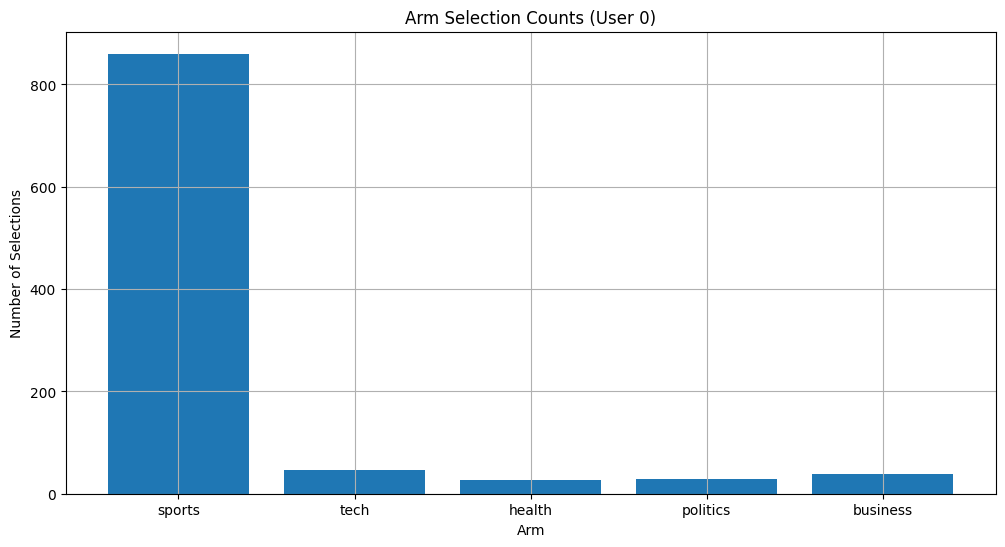

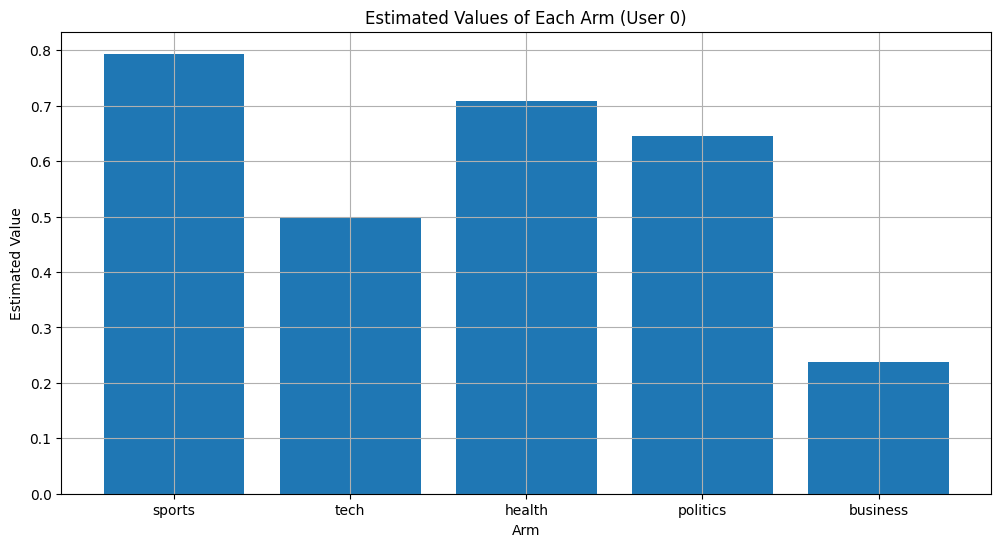

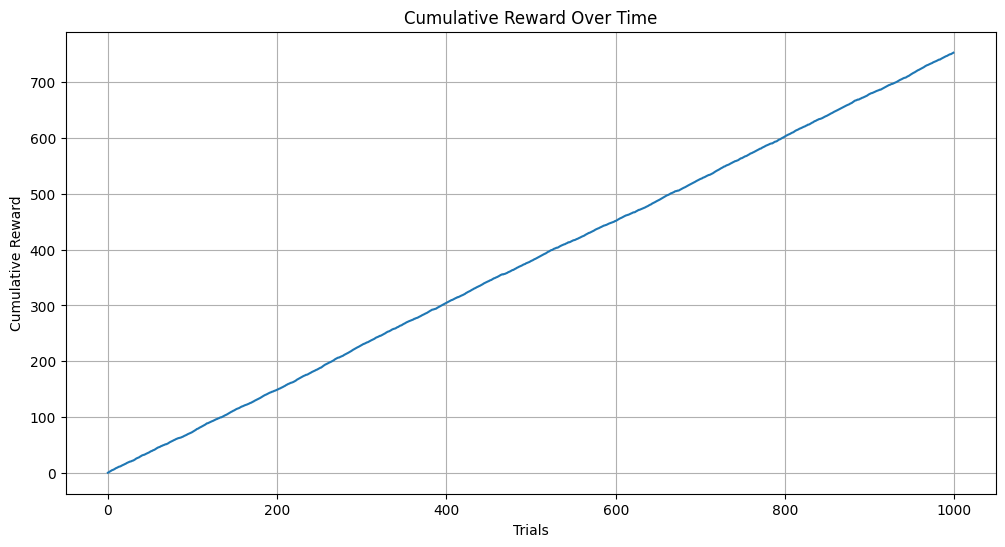

K-arm bandit ran for 1000 Epochs


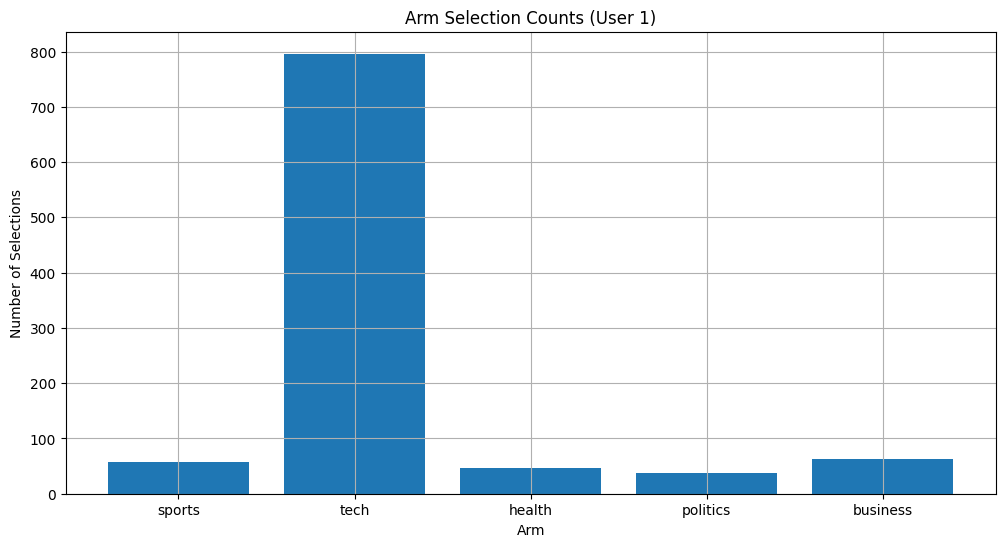

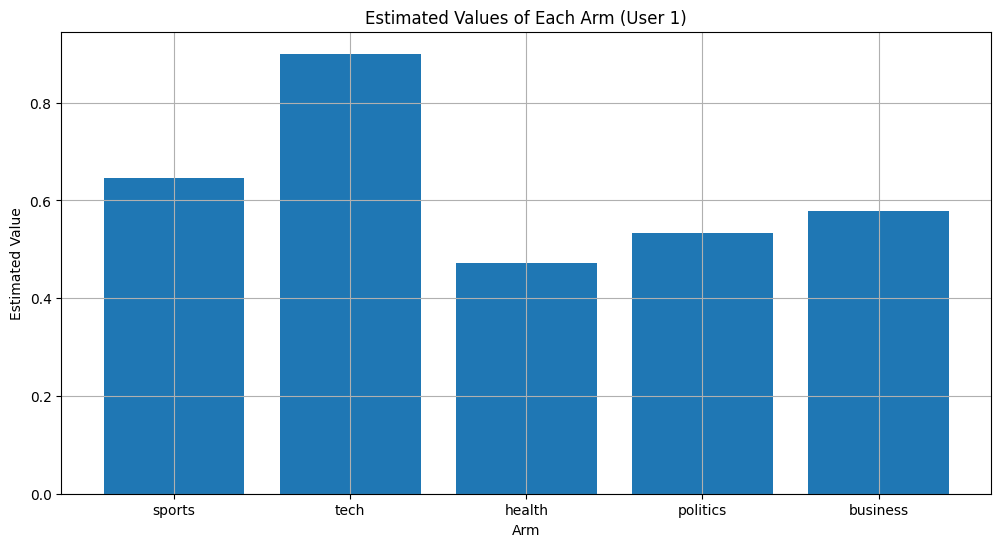

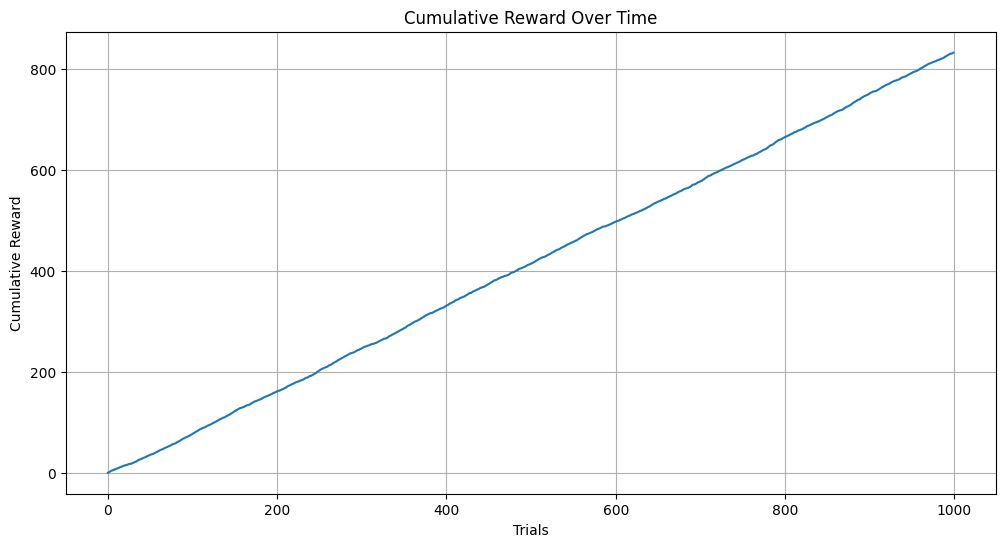

K-arm bandit ran for 1000 Epochs


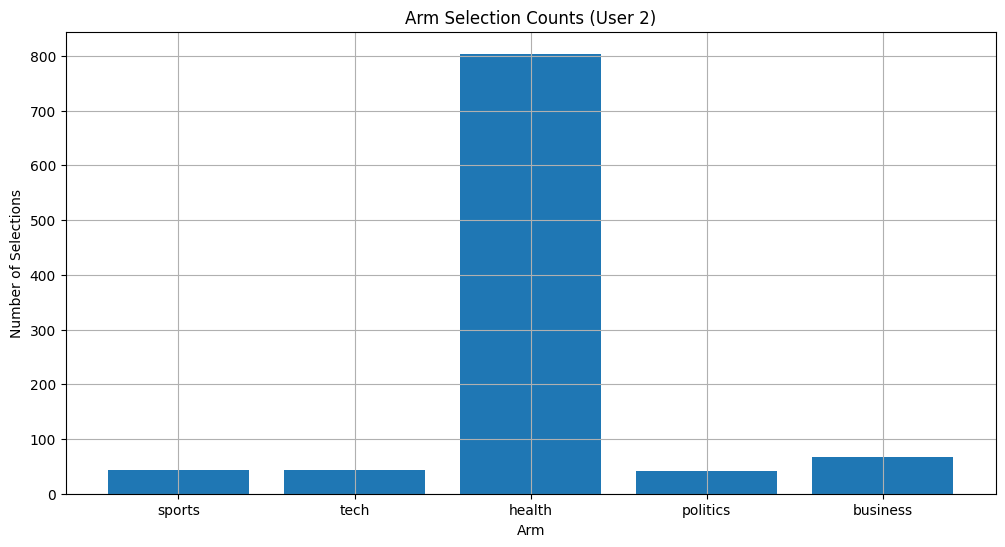

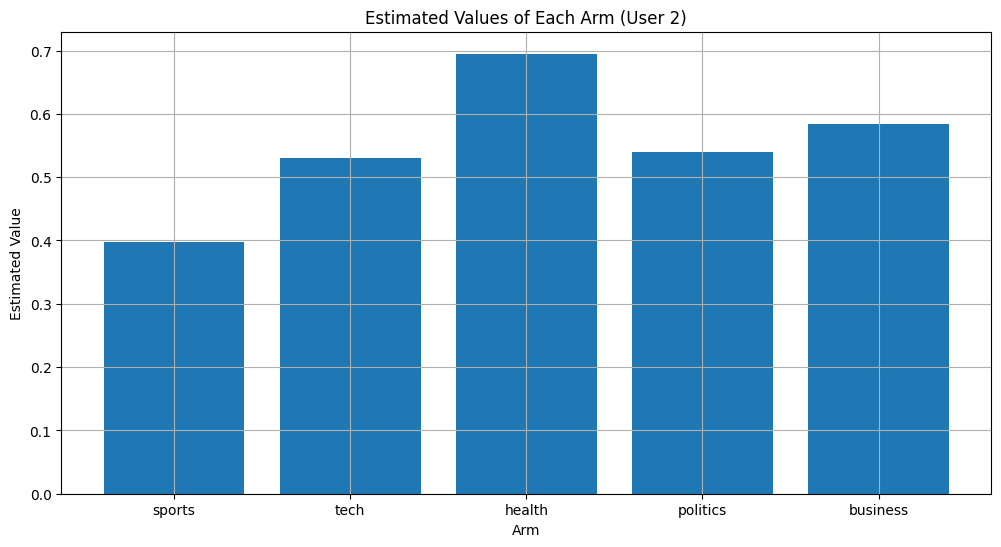

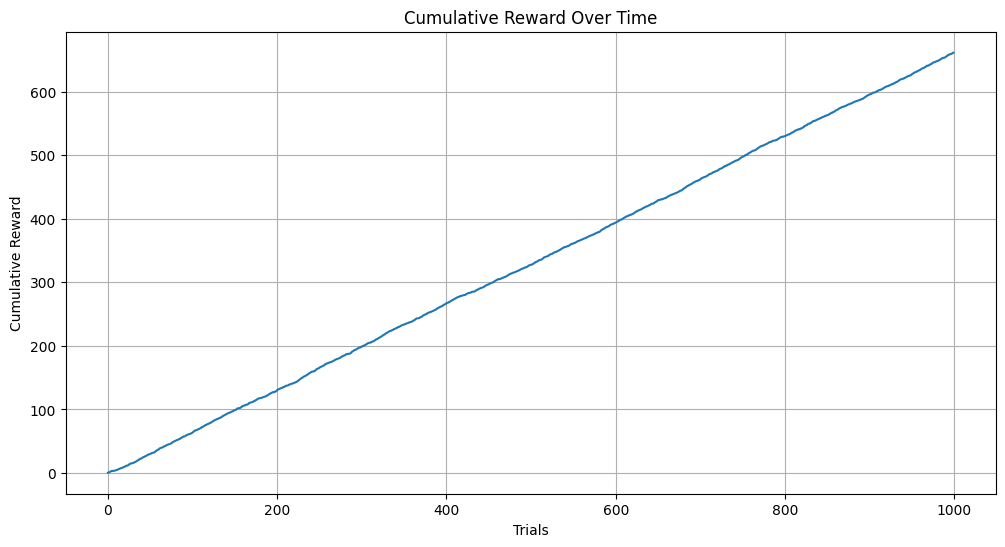

K-arm bandit ran for 1000 Epochs


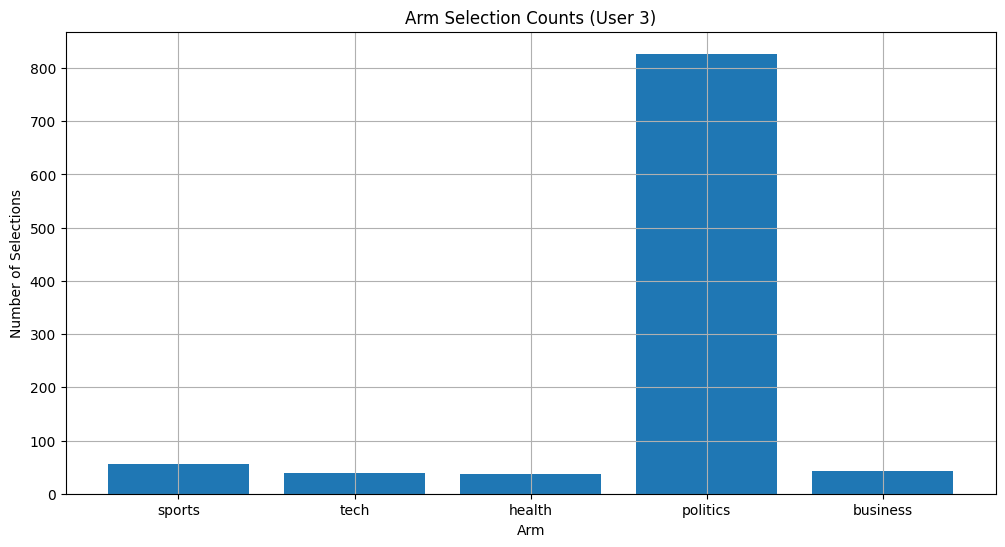

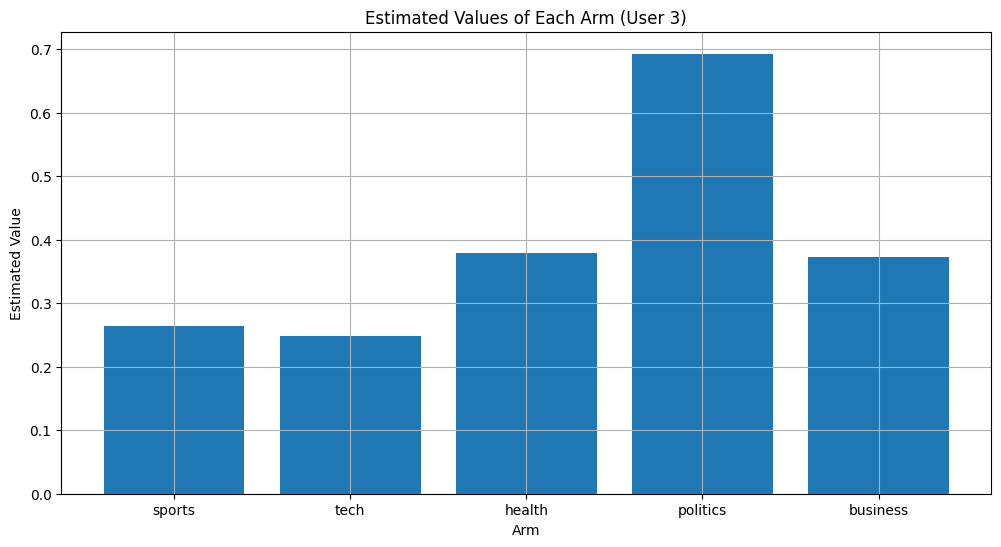

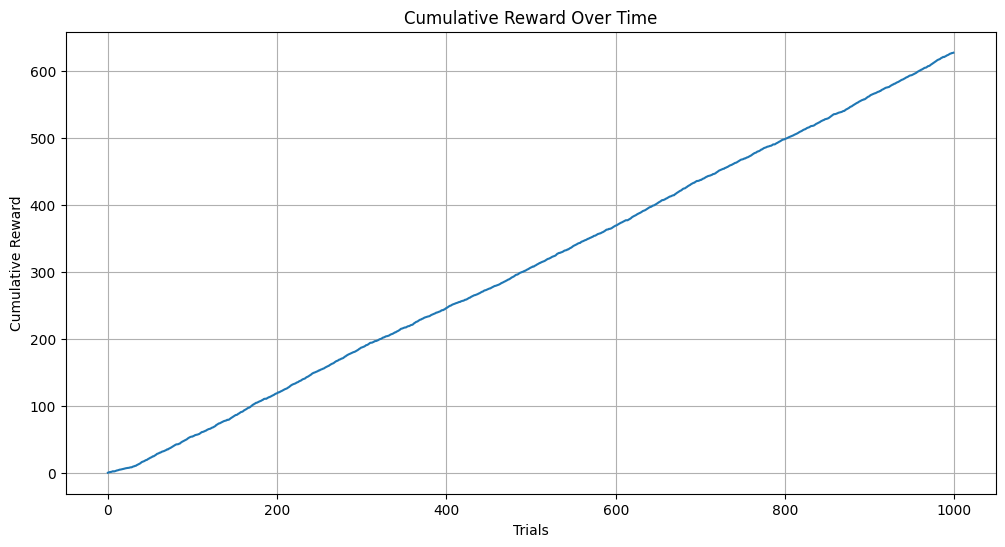

K-arm bandit ran for 1000 Epochs


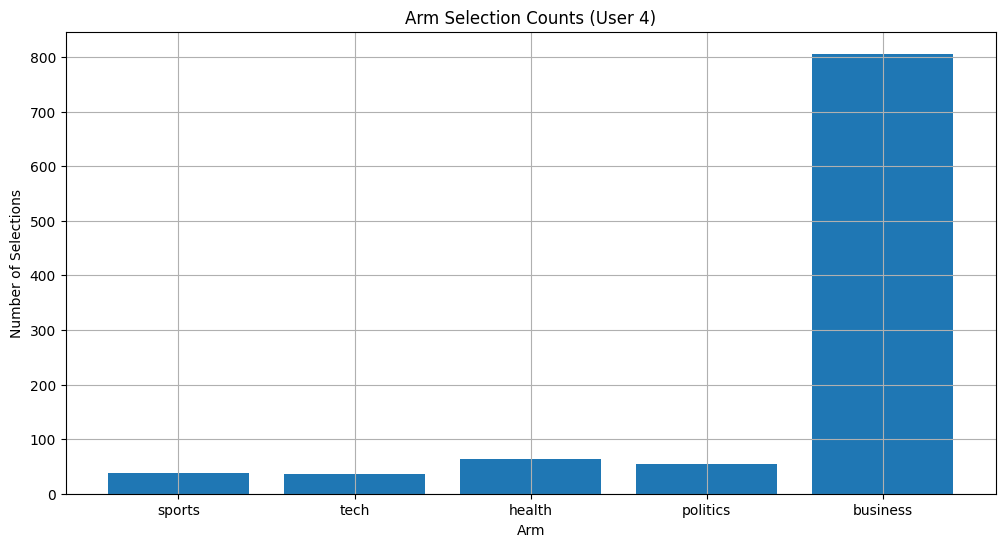

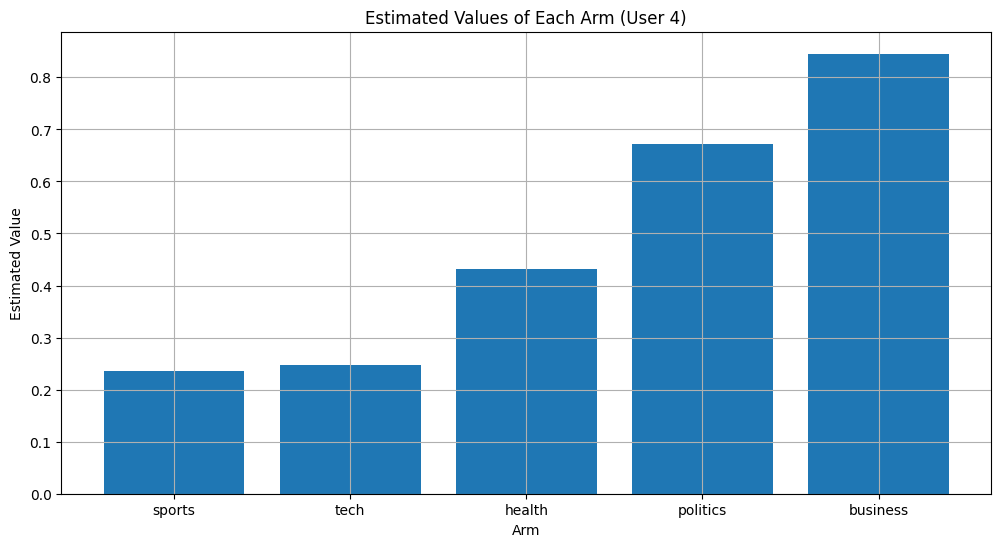

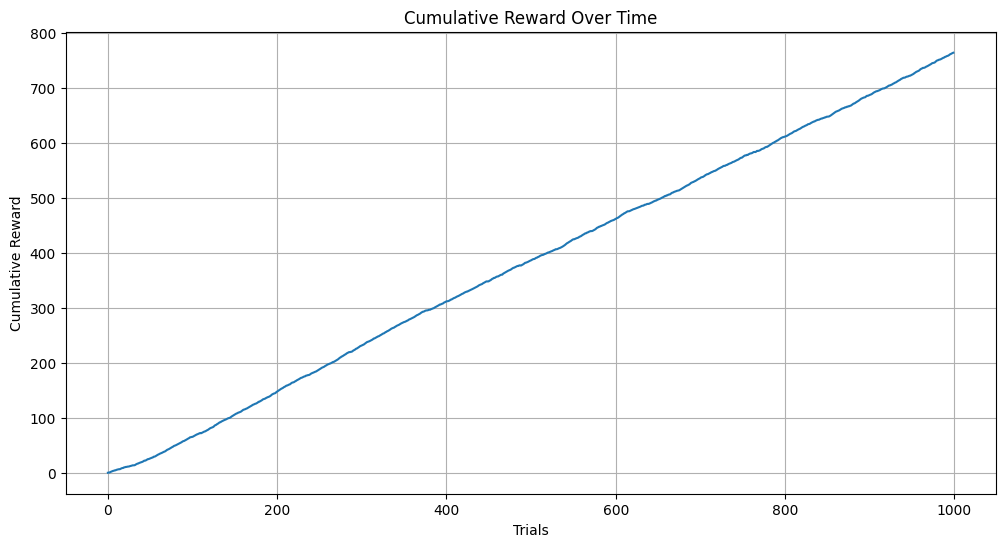

In [ ]:
n_arms = 5
n_trials = 1000
epsilon = 0.2
genre_rewards = {
    0: {'sports': (0.8, 0.2), 'tech': (0.5, 0.3), 'health': (0.65, 0.25), 'politics': (0.6, 0.2), 'business': (0.2, 0.25)},   # Sports lover
    1: {'sports': (0.65, 0.2), 'tech': (0.9, 0.3), 'health': (0.5, 0.15), 'politics': (0.55, 0.3), 'business': (0.65, 0.3)},  # Tech enthusiast
    2: {'sports': (0.4, 0.2), 'tech': (0.5, 0.25), 'health': (0.7, 0.3), 'politics': (0.55, 0.25), 'business': (0.6, 0.3)},   # Health conscious
    3: {'sports': (0.25, 0.15), 'tech': (0.3, 0.2), 'health': (0.35, 0.3), 'politics': (0.7, 0.25), 'business': (0.4, 0.2)},  # Politics enthusiast
    4: {'sports': (0.3, 0.2), 'tech': (0.25, 0.3), 'health': (0.45, 0.3), 'politics': (0.6, 0.3), 'business': (0.85, 0.3)},   # Business interested
}

for i in genre_rewards:
    true_rewards = genre_rewards[i]
    rewards, cumulative_rewards, selected_arms, bandit = simulate_greedy_bandit(n_arms, n_trials, epsilon, true_rewards)
    # Arm Selection Counts
    plt.figure(figsize=(12, 6))
    plt.bar(range(n_arms), bandit.arm_counts)
    plt.xlabel('Arm')
    plt.ylabel('Number of Selections')
    plt.title(f'Arm Selection Counts (User {i})')
    plt.xticks(range(n_arms), [genre_mapping[j] for j in range(n_arms)])
    plt.grid(True)
    plt.show()
    # Estimated Values of Each Arm
    plt.figure(figsize=(12, 6))
    plt.bar(range(n_arms), bandit.q_values)
    plt.xlabel('Arm')
    plt.ylabel('Estimated Value')
    plt.title(f'Estimated Values of Each Arm (User {i})')
    plt.xticks(range(n_arms), [genre_mapping[j] for j in range(n_arms)])
    plt.grid(True)
    plt.show()
    # Cumulative Reward Over Time
    plt.figure(figsize=(12, 6))
    plt.plot(cumulative_rewards)
    plt.xlabel('Trials')
    plt.ylabel('Cumulative Reward')
    plt.title('Cumulative Reward Over Time')
    plt.grid()
    plt.show()
    